# Kalman Filter

In [42]:
import numpy as np
import matplotlib.pyplot as plt

With the histogram filter we described the distribution using histograms. For the Kalman filter we use Gaussians.

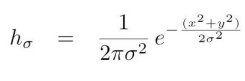

This is implemented in the code below:

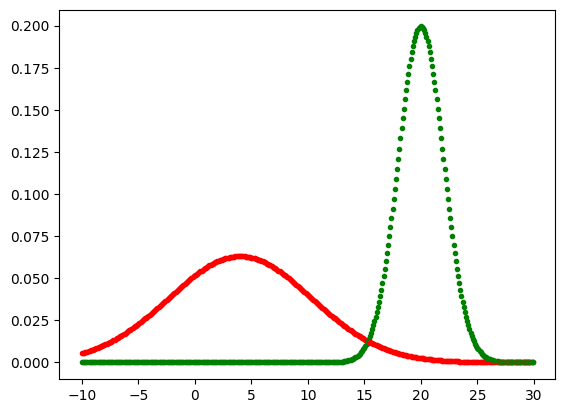

In [43]:
def f(u, sigma2, x):
    return 1/np.sqrt(2*np.pi*sigma2) * np.exp(-0.5* ((x-u)**2/sigma2))

u = 4        # Mean for the first Gaussian
v = 20       # Mean for the second Gaussian
sigma2 = 40  # Variance for the first Gaussian
r2 = 4       # Variance for the second Gaussian

for x in np.arange(-10, 30, 0.1):
    plt.plot(x, f(u, sigma2, x),'.r')
    plt.plot(x, f(v, r2, x),'.g')

# Exercise 2a
We have here plotted two distributions. The Kalman filter makes its measurement update by combining the information from these two gaussians. 

Plot the final Gaussian after the measurement update based on the two Gaussians plotted above. Use the following formulas to do so:

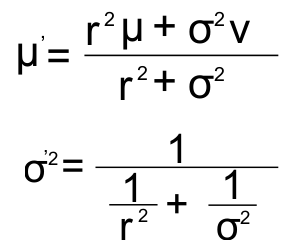

In [44]:
### Exercise 2a
### Compute and plot the Gaussian after measurement update

mean_combined = (r2*u + sigma2*v) / (r2 + sigma2)
variance_combined = 1 / (1/r2 + 1/sigma2)

print(mean_combined)
print(variance_combined)

def get_updated_gaussian(u, r2, v, sigma2):
    mean_combined = (r2*u + sigma2*v) / (r2 + sigma2)
    variance_combined = 1 / (1/r2 + 1/sigma2)
    
    return mean_combined, variance_combined

18.545454545454547
3.6363636363636362


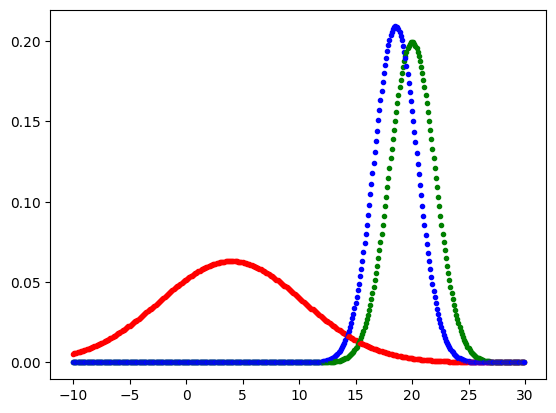

In [45]:
for x in np.arange(-10, 30, 0.1):
    plt.plot(x, f(u, sigma2, x),'.r')
    plt.plot(x, f(v, r2, x),'.g')
    plt.plot(x, f(mean_combined, variance_combined, x),'.b')

Notice that the resulting Gaussian has a higher peak than both of the others. This means that combining the two Gaussians we get a result that has less uncertainty than either of the original Gaussians.



 
 
 






Next we have the prediction or motion update. This one is simply made by adding the motion to the Gaussian mean and the motion variance to the Gaussian variance:


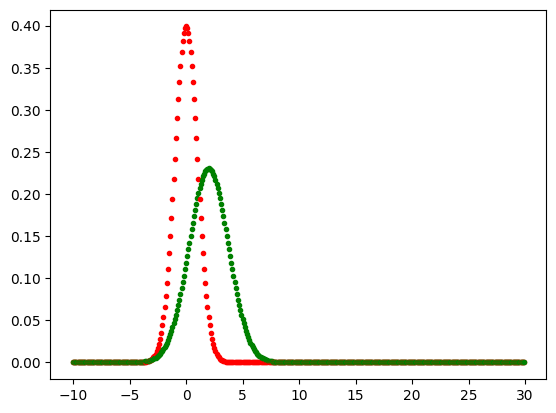

In [46]:
def predict(u1, s2_1, u2, s2_2):
    u = u1 + u2
    s2 = s2_1 + s2_2
    return [u, s2]

u = 0
s2 = 1

motion = 2
motion_sigma2 = 2

[u_pred, s2_pred] = predict(u, s2, motion, motion_sigma2)

for x in np.arange(-10, 30, 0.1):
    plt.plot(x, f(u, s2, x),'.r')
    plt.plot(x, f(u_pred, s2_pred, x),'.g')

# Exercise 2b
Combine the update function you made in the previous exercise with the predict function given above and plot all the Gaussians calculated using the measurements and motions given in the code below:

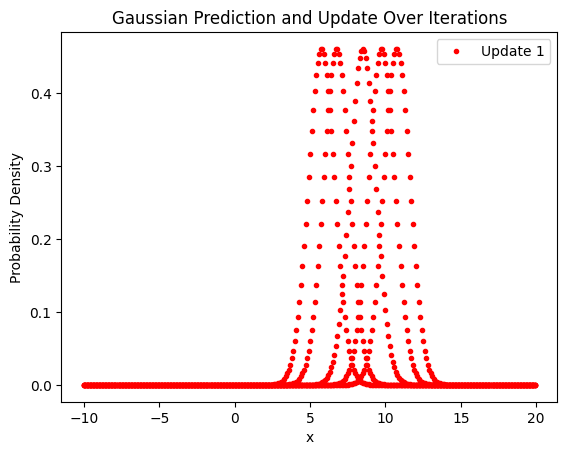

In [47]:
### Exercise 2b
measurements = [5, 6, 7, 9, 10]
measure_sigma = 4
motion = [1, 1, 2, 1, 1]
motion_sigma = 2

# Compute Gaussians and plot after each update/prediction

for i in range(len(motion)):
    [u_pred, s2_pred] = predict(measurements[i], s2, motion[i], motion_sigma2)
    
    u_prim, sigma2_prim = get_updated_gaussian(measurements[i], s2, u_pred, s2_pred)
    
    x_values = np.arange(-10, 20, 0.1)
    # plt.plot(x_values, f(measurements[i], s2, x_values), '.b', label=f'Measurement {i+1}' if i == 0 else "")
    # plt.plot(x_values, f(u_pred, s2_pred, x_values), '.g', label=f'Prediction {i+1}' if i == 0 else "")
    plt.plot(x_values, f(u_prim, sigma2_prim, x_values), '.r', label=f'Update {i+1}' if i == 0 else "")
        


plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Prediction and Update Over Iterations')
plt.legend()
plt.show() 
    

# Exercise 2c

It's now time to look at the more general equations of the Kalman filter. We would like to apply a Kalman filter for a robot moving in 1D. We would like to track and predict its position and its velocity. 

A quick summary of the variables:

**x** : The state matrix. Holds the state of the robot, which is its position and velocity.

**P** : The uncertainty of the state.

**u** : The external motion. In this case there will not be an external motion affecting the robot.

**F** : The transition matrix (or next state function). Used to predict the next state of the robot.

**H** : The observation matrix (or measurement function). Used to update the robot state.

**R** : The measurement uncertainty. 

**I** : Identity matrix.

You will now have to implement your own update and predict function using the formulas given here. All the matrices are given in the code below. 

When you multiply matrices together you can use [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html). To get the inverse of a matrix, you can use [np.linalg.pinv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html). To get the transpose you can use [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

The two equations written in black are the equations used for prediction and the rest are the equations used for updating.

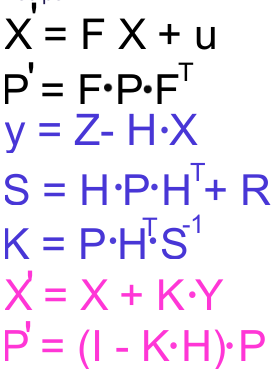

In [56]:
# The initial state. The robot starts in position 0 with the velocity 0.
x = np.array([[0],
              [0]])

# The initial uncertainty. We start with some very large values.
P = np.array([[1000, 0],
              [0, 1000]])

# The external motion. Set to 0 here.
u = np.array([[0],
              [0]])

# The transition matrix. 
F = np.array([[1, 1],
              [0, 1]])

# The observation matrix. We only get the position as measurement.
H = np.array([[1, 0]])

# The measurement uncertainty
R = 1

# The identity matrix. Simply a matrix with 1 in the diagonal and 0 elsewhere.
I = np.array([[1, 0],
              [0, 1]])

# The measured position. The robot move 1 every time, but due to sensor uncertainties, we measure a bit off.
measurements = [1, 2.1, 2.9, 4.1, 5.0, 5.9, 7.1, 8.1]
    
#     return x_prim, p_prim
def update(x, P, Z, H, R):
    # Measurement update
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    Y = Z - H @ x
    x = x + K @ Y
    P = (I - K @ H) @ P
    return x, P

def predict(x, P, F, u):
    # Prediction step
    x = F @ x + u
    P = F @ P @ F.T
    return x, P
    
### Loop through the measurements ###

Estimated position: 6.01, Estimated velocity: 0.47
Estimated position: 4.97, Estimated velocity: 0.23
Estimated position: 4.47, Estimated velocity: 0.13
Estimated position: 4.45, Estimated velocity: 0.11
Estimated position: 4.68, Estimated velocity: 0.12
Estimated position: 5.08, Estimated velocity: 0.15
Estimated position: 5.69, Estimated velocity: 0.20
Estimated position: 6.39, Estimated velocity: 0.25


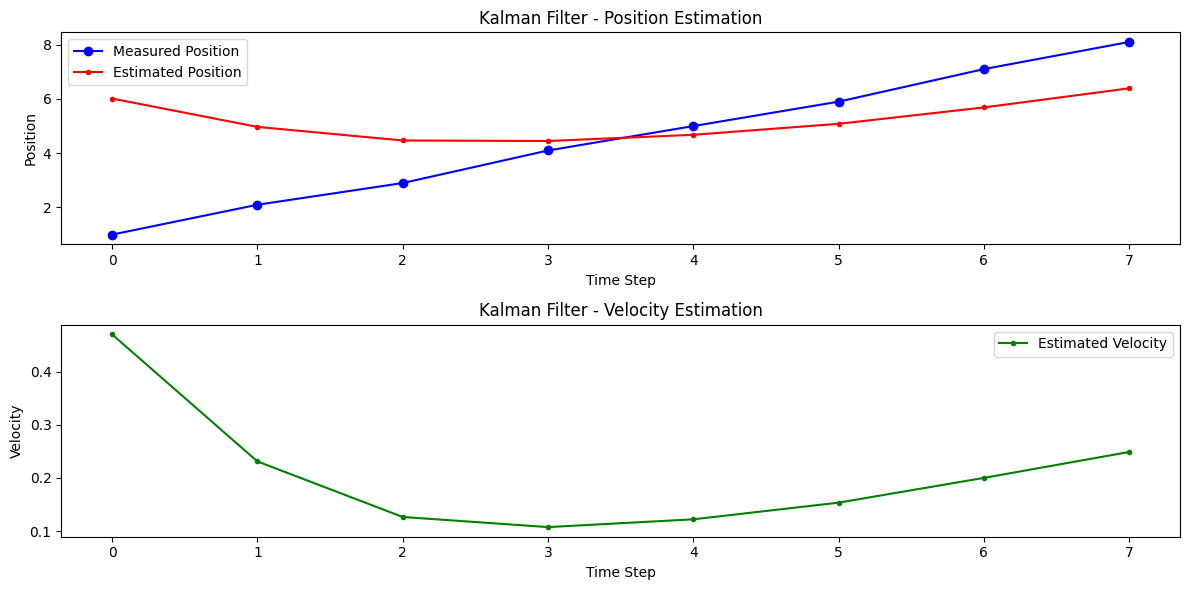

In [58]:
estimated_positions = []
estimated_velocities = []
measured_positions = []

for i in range(len(measurements)):
    
    # [u_pred, s2_pred] = predict(x, P, F, 0)
    
    # u_prim, sigma2_prim = update(x, P, measurements[i], H, R)
    
    x, P = predict(x, P, F, u)
    
    # Update step with the new measurement
    Z = np.array([[measurements[i]]])
    x, P = update(x, P, Z, H, R)
    
    x_values = np.arange(-10, 20, 0.1)
    # plt.plot(x_values, f(measurements[i], s2, x_values), '.b', label=f'Measurement {i+1}' if i == 0 else "")
    # plt.plot(x_values, f(u_pred, s2_pred, x_values), '.g', label=f'Prediction {i+1}' if i == 0 else "")
    # plt.plot(x_values, f(u_prim, sigma2_prim, x_values), '.r', label=f'Update {i+1}' if i == 0 else "")
    
    print(f"Estimated position: {x[0, 0]:.2f}, Estimated velocity: {x[1, 0]:.2f}")
    
    estimated_positions.append(x[0, 0])
    estimated_velocities.append(x[1, 0])
    measured_positions.append(measurements[i])
        


plt.figure(figsize=(12, 6))

# Plot estimated positions vs measured positions
plt.subplot(2, 1, 1)
plt.plot(measured_positions, 'bo-', label='Measured Position')
plt.plot(estimated_positions, 'r.-', label='Estimated Position')
plt.title('Kalman Filter - Position Estimation')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()

# Plot estimated velocities
plt.subplot(2, 1, 2)
plt.plot(estimated_velocities, 'g.-', label='Estimated Velocity')
plt.title('Kalman Filter - Velocity Estimation')
plt.xlabel('Time Step')
plt.ylabel('Velocity')
plt.legend()

plt.tight_layout()
plt.show()

Notice how the uncertainty **P** gets smaller and the predicted states gets more accurate than the actual measurements.

# Exercise 2d
Extent the previous matrices such that the robot can move in 2D. The update and predict functions don't have to be changed, only the matrices. For example the state matrix will now have to hold both the position and velocity in both the x- and y-direction: 


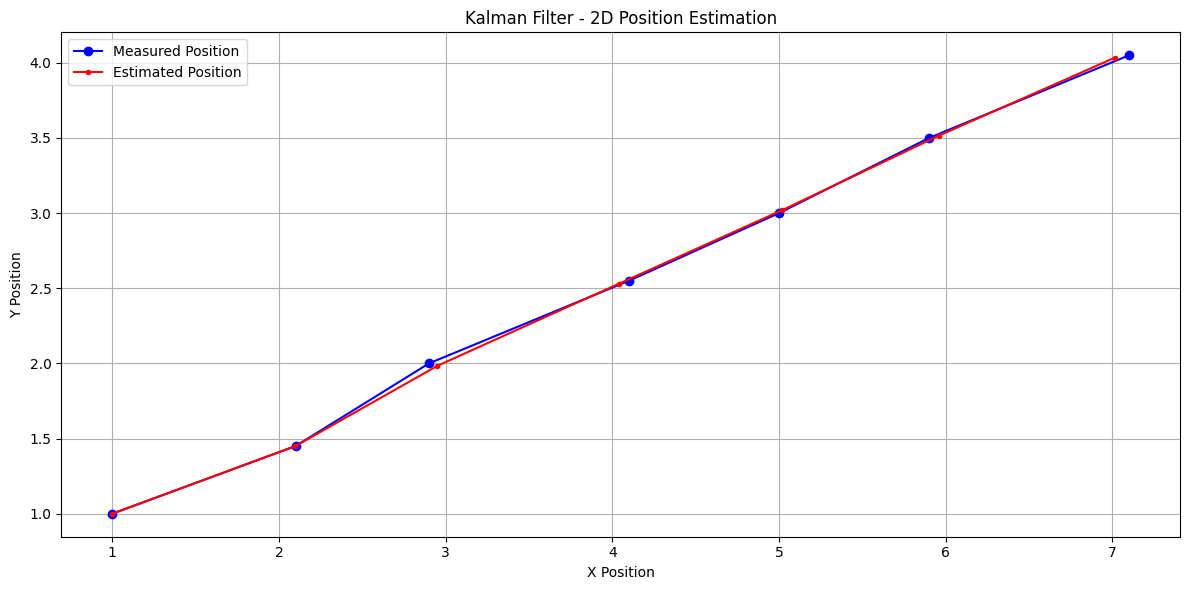

In [59]:
# The initial state. The robot starts in position 0 with the velocity 0.
x = np.array([[0], # Position along the x-axis
              [0], # Velocity along the x-axis
              [0], # Position along the y-axis
              [0]])# Velocity along the y-axis

P = np.array([[1000, 0, 0, 0],
              [0, 1000, 0, 0],
              [0, 0, 1000, 0],
              [0, 0, 0, 1000]])

# The external motion (none in this case).
u = np.zeros((4, 1))

# The state transition matrix for 2D motion.
F = np.array([[1, 1, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 1],
              [0, 0, 0, 1]])

# The observation matrix. We can observe positions but not velocities.
H = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])

# The measurement uncertainty (assume some noise).
R = np.array([[1, 0],
              [0, 1]])

# The identity matrix for the Kalman gain calculation.
I = np.eye(4)
### Update the rest of the parameters 

# You can use the following measurements or come up with your own. 
measurements_x = [1, 2.1, 2.9, 4.1, 5.0, 5.9, 7.1]
measurements_y = [1, 1.45, 2.0, 2.55, 3, 3.5, 4.05]

estimated_positions_x = []
estimated_positions_y = []
measured_positions_x = []
measured_positions_y = []

# Run through the measurements
for i in range(len(measurements_x)):
    # Prediction step
    x, P = predict(x, P, F, u)
    
    # Update step with the new measurement
    Z = np.array([[measurements_x[i]],
                  [measurements_y[i]]])
    x, P = update(x, P, Z, H, R)
    
    # Store the results
    estimated_positions_x.append(x[0, 0])
    estimated_positions_y.append(x[2, 0])
    measured_positions_x.append(measurements_x[i])
    measured_positions_y.append(measurements_y[i])

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot estimated positions vs measured positions in 2D
plt.plot(measured_positions_x, measured_positions_y, 'bo-', label='Measured Position')
plt.plot(estimated_positions_x, estimated_positions_y, 'r.-', label='Estimated Position')
plt.title('Kalman Filter - 2D Position Estimation')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()